## Predict Loan Eligibility using Decision Tree Algorithm

### Problem Statement: A particular person is able to deposit his/her EMI or not

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing #For label encoding
from sklearn.model_selection import train_test_split #To split data in training and testing
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn import metrics #For model evaluation
from sklearn.model_selection import GridSearchCV #To find the best hyperparameter for decision tree

In [2]:
#Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None) # To display entire columns

### Read Data From CSV

In [4]:
#import data
real_df = pd.read_csv('bank.csv')

In [6]:
real_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
real_df.shape

(11162, 17)

In [63]:
real_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Data Pre-Processing

In [9]:
encoded_df = real_df.copy()

In [10]:
#label encoding for all the categorical features
le = preprocessing.LabelEncoder()
for i in real_df.select_dtypes(include='object').columns:
    encoded_df[i] = le.fit_transform(encoded_df[i])       

In [11]:
encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [12]:
#Defining Target and Predictor Features
X = encoded_df.drop(['deposit'], axis=1)
Y = encoded_df['deposit']

### Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=4)
#Selected random state 2, my sample should be the good representation of population
#Randome state, its a seed number

In [14]:
#Check deposit rate in training and testing data, should be statistically equal
print(f'Shape of training data:{X_train.shape}')
print(f'Shape of testing data:{X_test.shape}')
print(f'Deposit rate in training:{y_train.mean()}')
print(f'Deposit rate in testing:{y_test.mean()}')
#If random state is changing the deposit rate is changing, both rate are same keep random state (4) constant

Shape of training data:(8929, 16)
Shape of testing data:(2233, 16)
Deposit rate in training:0.4736252659872326
Deposit rate in testing:0.47469771607702643


### Build Decision Tree Model

In [15]:
#Decision Tree Model
dtree = DecisionTreeClassifier(criterion='gini', random_state=4)
dtree.fit(X_train, y_train)
print(f'Training Score: {dtree.score(X_train, y_train)}')
print(f'Testing Score: {dtree.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.7823555754590238


In [16]:
#Decision Tree with max_depth = 2
dtree_2 = DecisionTreeClassifier(criterion='gini', random_state=4, max_depth=2)
dtree_2.fit(X_train, y_train)
print(f'Training Score: {dtree_2.score(X_train, y_train)}')
print(f'Testing Score: {dtree_2.score(X_test, y_test)}')

Training Score: 0.7132937618994288
Testing Score: 0.703090013434841


In [17]:
#Decision Tree with max_depth = 4
dtree_4 = DecisionTreeClassifier(criterion='gini', random_state=4, max_depth=4)
dtree_4.fit(X_train, y_train)
print(f'Training Score: {dtree_4.score(X_train, y_train)}')
print(f'Testing Score: {dtree_4.score(X_test, y_test)}')

Training Score: 0.7975137193414716
Testing Score: 0.7725033587102552


In [18]:
#Decision Tree with max_depth = 6
dtree_6 = DecisionTreeClassifier(criterion='gini', random_state=4, max_depth=6)
dtree_6.fit(X_train, y_train)
print(f'Training Score: {dtree_6.score(X_train, y_train)}')
print(f'Testing Score: {dtree_6.score(X_test, y_test)}')

Training Score: 0.8245044237876582
Testing Score: 0.7962382445141066


In [19]:
#Find the best hyperparameter using GridSearhCV
param_dist = {'max_depth': [3, 4, 5, 6, 7], 'min_samples_split': [30, 40, 50,100,150,200,250]}
dtree_grid = GridSearchCV(dtree, param_grid=param_dist, cv=10, n_jobs=2)
dtree_grid.fit(X_train, y_train)
print('Best Parameters using GridSearchCV:',dtree_grid.best_params_)

Best Parameters using GridSearchCV: {'max_depth': 7, 'min_samples_split': 100}


In [20]:
#Set the best parameter given by GridSearchCV to dtree
dtree = DecisionTreeClassifier(criterion='gini', random_state=4, max_depth=7, min_samples_split=100)
dtree.fit(X_train, y_train)
print(dtree.score(X_train, y_train))
print(dtree.score(X_test, y_test))

0.8324560421099787
0.8087774294670846


### Model Evaluation

In [21]:
y_pred_dtree = dtree.predict(X_test)

Text(0.5, 1.0, 'Confusion Metrics for Decision Tree')

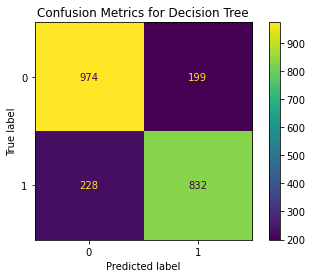

In [22]:
#Confusion Metrics
metrics.plot_confusion_matrix(dtree, X_test, y_test)
plt.title('Confusion Metrics for Decision Tree')

In [23]:
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred_dtree)}')
print(f'Precision: {metrics.precision_score(y_test, y_pred_dtree)}')
print(f'Recall: {metrics.recall_score(y_test, y_pred_dtree)}')
print(f'F1 Score: {metrics.f1_score(y_test, y_pred_dtree)}')

Accuracy: 0.8087774294670846
Precision: 0.8069835111542192
Recall: 0.7849056603773585
F1 Score: 0.795791487326638


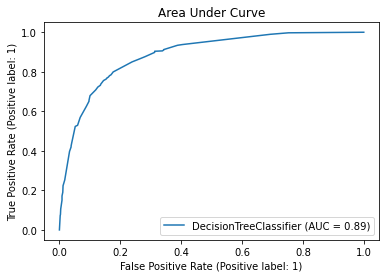

In [42]:
#Area Under Curve
metrics.plot_roc_curve(dtree, X_test, y_test)
plt.title('Area Under Curve')
plt.show()